# NLP and Word Cloud Generation

This part is how to generate a word cloud using Python, and how to apply a custom mask to get it into 
any shape you want it to be in. As you can see, I should have removed numbers and links before making the word cloud... 

In [91]:
#libraries needed
import pandas as pd
import re
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from wordcloud import WordCloud, ImageColorGenerator

In [98]:
def normalize(text, join_sentences = True, stops = True, stemmer = False):
    if type(text) not in [type(''),type(u'')]:
        return text
    r = RegexpReplacer()
    p_stemmer = PorterStemmer()
    word_punct_tokenizer = WordPunctTokenizer()
    repeat = RepeatReplacer()
    x = re.compile('[%s]' % re.escape(string.punctuation))
    if stops:
        stops = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    normalized_sentences = []
    for sentence in sentences:
        #tokens = word_tokenize(r.replace(sentence.lower()))
        tokens = word_punct_tokenizer.tokenize(r.replace(sentence.lower()))
        no_punct = [token for token in tokens if x.sub(u'', token)]
        no_repeat = [replacer.replace(word) for word in no_punct]
        if stops:
            no_repeat = [word for word in no_repeat if word not in stops]
        if stemmer:
            no_repeat = [p_stemmer.stem(word) for word in no_repeat]
        normalized_sentences.append(' '.join(no_repeat))
    if join_sentences:
        normalized_sentences = ' '.join(normalized_sentences)
        return normalized_sentences
    return [normalized_sentence for normalized_sentence in normalized_sentences]

In [95]:
replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
    (r'gonna','going to'),
    (r'wanna','want to')
]
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in
        patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [100]:
replacer = RepeatReplacer()

class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if len(word) > 100:
            return ''
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [101]:
#df is the dataframe of cleaned messages obtained once the .txt file was processed previously
df['Text_Normalized'] = df.Text.apply(normalize)

In [102]:
df2 = df.text_normalized.dropna()

In [103]:
top_1000 = pd.Series(' '.join(df2).split()).value_counts()[:1000]

In [107]:
stopwords = set()
wc = WordCloud(stopwords=stopwords)

In [117]:
wc.generate_from_frequencies(top_1000.to_dict())

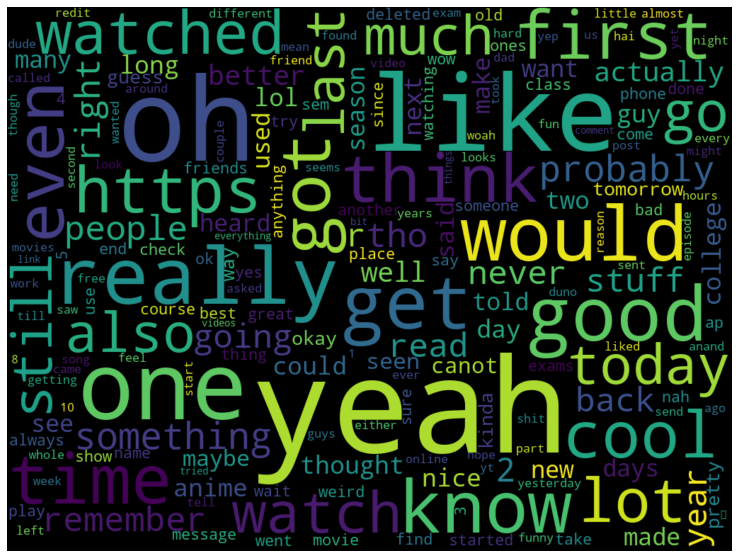

In [118]:
#Plotting a word cloud with the top 1000 most used words
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [189]:
#using an image of a cloud as a mask
custom_mask = np.array(Image.open("cloudPic.jpg"))

In [190]:
wc = WordCloud(background_color="white", max_words=200, mask=custom_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

In [191]:
wc.generate_from_frequencies(top_1000.to_dict())

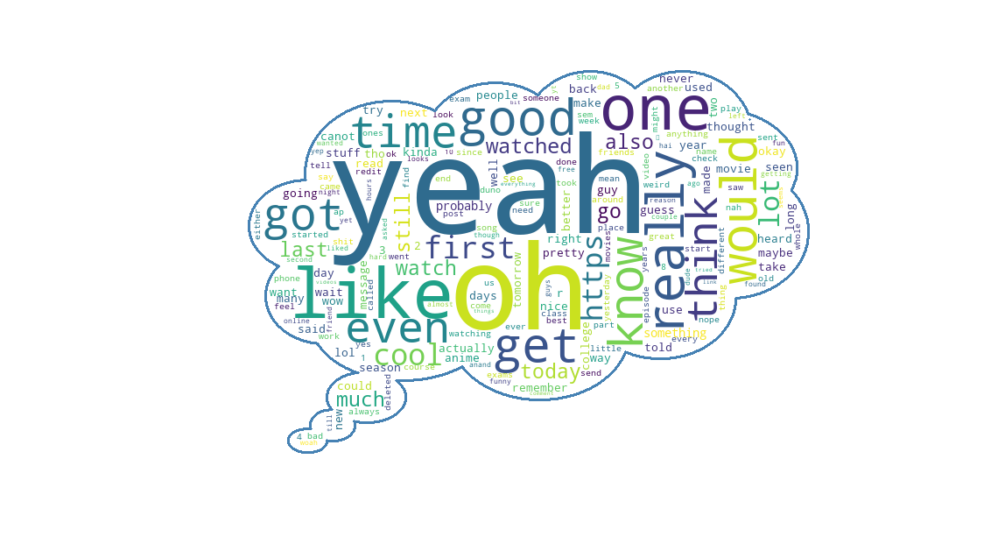

In [172]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()